In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
model = tf.keras.models.Sequential(name='dnn_mnist')
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # adding the final layers
model.compile(optimizer=tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


2022-07-25 16:02:07.384046: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
model.fit(x_train, y_train, epochs = 5, verbose=0)

In [5]:

print(model.evaluate(x_test, y_test,verbose=0))
print(model.evaluate(x_train, y_train,verbose=0))

[0.24324145913124084, 0.9473000168800354]
[0.16881218552589417, 0.9567333459854126]


In [6]:
predictions = model.predict(x_test)

In [7]:
predictions[0]

array([1.9224080e-32, 1.2933859e-14, 1.3901844e-09, 8.6047706e-08,
       2.3492134e-14, 6.5222994e-11, 1.1586215e-32, 9.9999988e-01,
       3.6024383e-10, 1.6847176e-09], dtype=float32)

In [8]:
np.argmax(predictions[0])

7

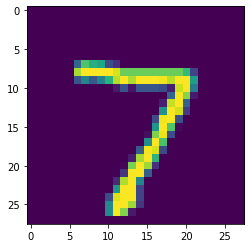

In [9]:
plot.imshow(x_test[0])

6


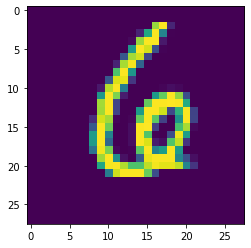

In [10]:
x = int(input())
print(np.argmax(predictions[x]))
plot.imshow(x_test[x])

In [47]:
train_results = model.evaluate(x_train, y_train, verbose=0)
test_results = model.evaluate(x_test, y_test, verbose=0)
results = {'test_results': test_results, 'train_results':train_results}

In [48]:
df = pd.DataFrame(results, index=['Loss', 'Percent Accuracy'])
print(df)

                  test_results  train_results
Loss                  0.196613       0.039012
Percent Accuracy      0.974500       0.992000


In [49]:
print(df)

                  test_results  train_results
Loss                  0.196613       0.039012
Percent Accuracy      0.974500       0.992000
